# 보스턴집값데이터 회귀분석(라쏘, 릿지, 엘라스틱넷)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip install koreanize-matplotlib

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/01%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A7%91%EA%B0%92%EB%8D%B0%EC%9D%B4%ED%84%B0.csv")
data.head()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


[01] CRIM 자치시(town) 별 1인당 범죄율
[02] ZN 25,000 평방피트를 초과하는 거주지역의 비율
[03] INDUS 비소매상업지역이 점유하고 있는 토지의 비율
[04] CHAS 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
[05] NOX 10ppm 당 농축 일산화질소
[06] RM 주택 1가구당 평균 방의 개수
[07] AGE 1940년 이전에 건축된 소유주택의 비율
[08] DIS 5개의 보스턴 직업센터까지의 접근성 지수
[09] RAD 방사형 도로까지의 접근성 지수
[10] TAX 10,000 달러 당 재산세율
[11] PTRATIO 자치시(town)별 학생/교사 비율
[12] B 1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함.
[13] LSTAT 모집단의 하위계층의 비율(%)
[14] MEDV 본인 소유의 주택가격(중앙값) (단위: $1,000)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   범죄율           506 non-null    float64
 1   25,000평방피트초과  506 non-null    float64
 2   비소매상업지역비율     506 non-null    float64
 3   찰스강경계         506 non-null    int64  
 4   농축 일산화질소      506 non-null    float64
 5   가구당평균방수       506 non-null    float64
 6   1940년이전건축비율   506 non-null    float64
 7   직업센터접근성       506 non-null    float64
 8   도로접근성         506 non-null    int64  
 9   재산세율          506 non-null    float64
 10  학생/교사비율       506 non-null    float64
 11  흑인비율          506 non-null    float64
 12  하위계층비율        506 non-null    float64
 13  주택가격          506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
data.describe()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
data.columns

Index(['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격'],
      dtype='object')

In [7]:
stats = data.describe()
stats

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
stats = pd.concat([stats, pd.DataFrame([stats.loc['75%'] + (1.5 * (stats.loc['75%']-stats.loc['25%']))], index=["정상최대값"])])

In [9]:
stats = pd.concat([stats, pd.DataFrame([stats.loc['25%'] - (1.5 * (stats.loc['75%']-stats.loc['25%']))], index=["정상최소값"])])
stats

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000
정상최대값,9.069639,31.250000,37.465000,0.000000,0.886500,7.730500,167.650000,9.820800,54.000000,1246.500000,24.400000,427.496250,31.962500,36.962500
정상최소값,-5.310511,-18.750000,-14.175000,0.000000,0.186500,4.778500,-28.550000,-2.532200,-26.000000,-301.500000,13.200000,344.106250,-8.057500,5.062500


In [10]:
data.columns

Index(['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격'],
      dtype='object')

<Axes: >

C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51396 (\N{HANGUL SYLLABLE JOE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\finte

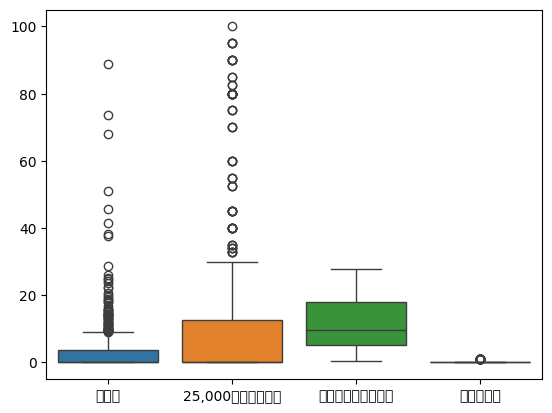

In [11]:
sns.boxplot(data[['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계']])

<Axes: >

C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech

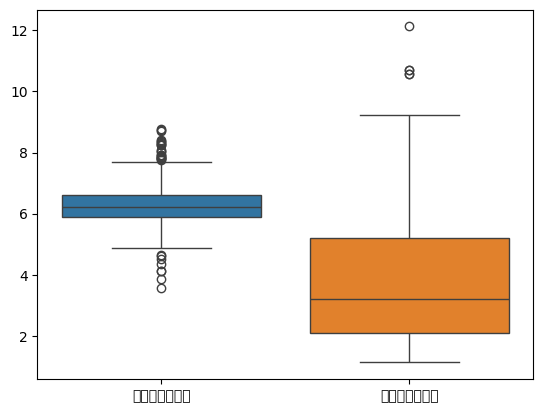

In [12]:
sns.boxplot(data[['가구당평균방수','직업센터접근성']])

<Axes: >

C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\li

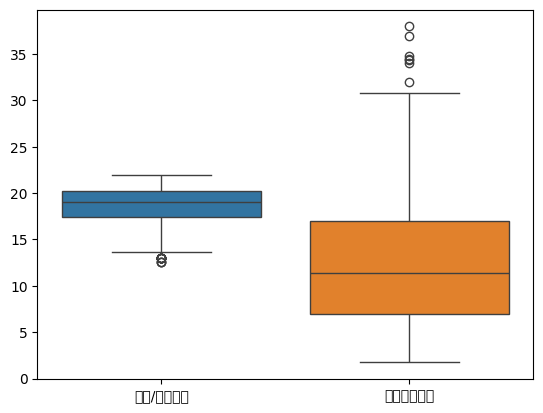

In [13]:
sns.boxplot(data[['학생/교사비율', '하위계층비율']])

<Axes: >

C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 55121 (\N{HANGUL SYLLABLE HEUG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 55121 (\N{HANGUL SYLLABLE HEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\5-11\min

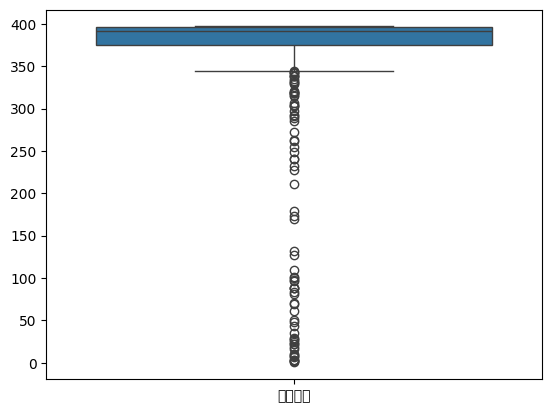

In [14]:
sns.boxplot(data[['흑인비율']])

<Axes: >

C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\5-11\min

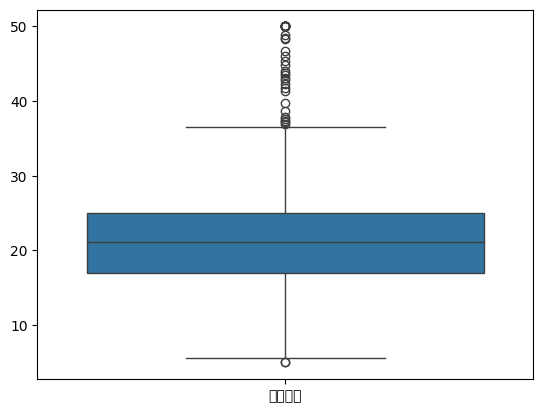

In [15]:
sns.boxplot(data[['주택가격']])

In [16]:
cols = data.columns
cols

Index(['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격'],
      dtype='object')

In [17]:
for col in cols[:-2]:
    print("="*20, col, "="*20)
    display(data.groupby(col)['주택가격'].describe())
    print()
    print()

==================== 범죄율 ====================


,count,mean,std,min,25%,50%,75%,max
범죄율,,,,,,,,
0.00632,1.0,24.0,NaN,24.0,24.0,24.0,24.0,24.0
0.00906,1.0,32.2,NaN,32.2,32.2,32.2,32.2,32.2
0.01096,1.0,22.0,NaN,22.0,22.0,22.0,22.0,22.0
0.01301,1.0,32.7,NaN,32.7,32.7,32.7,32.7,32.7
0.01311,1.0,35.4,NaN,35.4,35.4,35.4,35.4,35.4
...,...,...,...,...,...,...,...,...
45.74610,1.0,7.0,NaN,7.0,7.0,7.0,7.0,7.0
51.13580,1.0,15.0,NaN,15.0,15.0,15.0,15.0,15.0
67.92080,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0




==================== 25,000평방피트초과 ====================


,count,mean,std,min,25%,50%,75%,max
"25,000평방피트초과",,,,,,,,
0.0,372.0,20.473387,8.588108,5.0,14.900,19.75,23.100,50.0
12.5,10.0,20.130000,3.539947,15.0,17.775,19.90,21.925,27.1
17.5,1.0,33.000000,NaN,33.0,33.000,33.00,33.000,33.0
18.0,1.0,24.000000,NaN,24.0,24.000,24.00,24.000,24.0
20.0,21.0,35.466667,9.542606,20.7,30.100,35.20,43.500,50.0
21.0,4.0,22.150000,2.477230,19.7,20.300,21.95,23.800,25.0
22.0,10.0,25.320000,7.124418,17.6,21.450,24.45,25.850,42.8
25.0,10.0,22.440000,3.491323,16.0,20.250,23.10,24.575,28.0
28.0,3.0,22.833333,2.200757,20.6,21.750,22.90,23.950,25.0




==================== 비소매상업지역비율 ====================


,count,mean,std,min,25%,50%,75%,max
비소매상업지역비율,,,,,,,,
0.46,1.0,50.000000,NaN,50.0,50.000,50.00,50.000,50.0
0.74,1.0,24.700000,NaN,24.7,24.700,24.70,24.700,24.7
1.21,1.0,50.000000,NaN,50.0,50.000,50.00,50.000,50.0
1.22,1.0,35.400000,NaN,35.4,35.400,35.40,35.400,35.4
1.25,2.0,24.750000,2.616295,22.9,23.825,24.75,25.675,26.6
...,...,...,...,...,...,...,...,...
18.10,132.0,16.403788,8.539745,5.0,11.225,14.40,19.900,50.0
19.58,30.0,23.650000,11.963126,11.8,15.600,19.50,24.175,50.0
21.89,15.0,17.093333,2.560543,13.3,15.000,17.40,18.250,23.0




==================== 찰스강경계 ====================


,count,mean,std,min,25%,50%,75%,max
찰스강경계,,,,,,,,
0,471.0,22.093843,8.831362,5.0,16.6,20.9,24.80,50.0
1,35.0,28.440000,11.816643,13.4,21.1,23.3,33.15,50.0




==================== 농축 일산화질소 ====================


,count,mean,std,min,25%,50%,75%,max
농축 일산화질소,,,,,,,,
0.385,1.0,20.100000,NaN,20.1,20.100,20.10,20.100,20.1
0.389,1.0,22.000000,NaN,22.0,22.000,22.00,22.000,22.0
0.392,2.0,21.400000,0.707107,20.9,21.150,21.40,21.650,21.9
0.394,1.0,44.000000,NaN,44.0,44.000,44.00,44.000,44.0
0.398,2.0,21.450000,2.899138,19.4,20.425,21.45,22.475,23.5
...,...,...,...,...,...,...,...,...
0.713,18.0,15.527778,2.575177,11.7,13.650,14.90,17.375,20.2
0.718,6.0,18.433333,6.750309,8.4,14.825,19.30,21.900,27.5
0.740,13.0,12.646154,3.133320,8.4,10.500,12.60,14.900,18.4




==================== 가구당평균방수 ====================


,count,mean,std,min,25%,50%,75%,max
가구당평균방수,,,,,,,,
3.561,1.0,27.50,NaN,27.5,27.500,27.50,27.500,27.5
3.863,1.0,23.10,NaN,23.1,23.100,23.10,23.100,23.1
4.138,2.0,12.85,1.343503,11.9,12.375,12.85,13.325,13.8
4.368,1.0,8.80,NaN,8.8,8.800,8.80,8.800,8.8
4.519,1.0,7.00,NaN,7.0,7.000,7.00,7.000,7.0
...,...,...,...,...,...,...,...,...
8.375,1.0,50.00,NaN,50.0,50.000,50.00,50.000,50.0
8.398,1.0,48.80,NaN,48.8,48.800,48.80,48.800,48.8
8.704,1.0,50.00,NaN,50.0,50.000,50.00,50.000,50.0




==================== 1940년이전건축비율 ====================


,count,mean,std,min,25%,50%,75%,max
1940년이전건축비율,,,,,,,,
2.9,1.0,26.600000,NaN,26.6,26.600,26.60,26.600,26.6
6.0,1.0,24.100000,NaN,24.1,24.100,24.10,24.100,24.1
6.2,1.0,23.400000,NaN,23.4,23.400,23.40,23.400,23.4
6.5,1.0,24.700000,NaN,24.7,24.700,24.70,24.700,24.7
6.6,2.0,24.750000,0.777817,24.2,24.475,24.75,25.025,25.3
...,...,...,...,...,...,...,...,...
98.8,4.0,14.500000,2.342363,13.1,13.250,13.45,14.700,18.0
98.9,3.0,13.066667,5.519360,8.5,10.000,11.50,15.350,19.2
99.1,1.0,10.900000,NaN,10.9,10.900,10.90,10.900,10.9




==================== 직업센터접근성 ====================


,count,mean,std,min,25%,50%,75%,max
직업센터접근성,,,,,,,,
1.1296,1.0,50.00,NaN,50.0,50.000,50.00,50.000,50.0
1.1370,1.0,13.80,NaN,13.8,13.800,13.80,13.800,13.8
1.1691,1.0,50.00,NaN,50.0,50.000,50.00,50.000,50.0
1.1742,1.0,13.80,NaN,13.8,13.800,13.80,13.800,13.8
1.1781,1.0,11.90,NaN,11.9,11.900,11.90,11.900,11.9
...,...,...,...,...,...,...,...,...
9.2203,2.0,21.40,0.707107,20.9,21.150,21.40,21.650,21.9
9.2229,1.0,33.00,NaN,33.0,33.000,33.00,33.000,33.0
10.5857,2.0,19.40,1.697056,18.2,18.800,19.40,20.000,20.6




==================== 도로접근성 ====================


,count,mean,std,min,25%,50%,75%,max
도로접근성,,,,,,,,
1,20.0,24.365000,8.024454,11.9,20.475,22.20,27.225,50.0
2,24.0,26.833333,7.874376,15.7,21.400,23.85,33.225,43.8
3,38.0,27.928947,8.324692,14.4,21.125,26.50,34.525,50.0
4,110.0,21.387273,6.957883,7.0,17.575,20.45,23.650,50.0
5,115.0,25.706957,9.328401,11.8,19.500,23.00,30.000,50.0
6,26.0,20.976923,2.312801,16.8,18.900,21.20,23.025,24.8
7,17.0,27.105882,6.493215,17.6,24.300,26.20,29.600,42.8
8,24.0,30.358333,9.727724,16.0,23.825,28.25,33.175,50.0
24,132.0,16.403788,8.539745,5.0,11.225,14.40,19.900,50.0




==================== 재산세율 ====================


,count,mean,std,min,25%,50%,75%,max
재산세율,,,,,,,,
187.0,1.0,30.100000,NaN,30.1,30.100,30.1,30.100,30.1
188.0,7.0,19.428571,2.281603,15.7,18.050,20.3,20.950,22.0
193.0,8.0,36.200000,7.177146,26.4,31.775,36.7,38.375,50.0
198.0,1.0,50.000000,NaN,50.0,50.000,50.0,50.000,50.0
216.0,5.0,38.980000,6.207415,33.0,35.100,35.4,45.400,46.0
...,...,...,...,...,...,...,...,...
432.0,9.0,19.688889,1.498703,18.3,18.700,19.2,20.400,22.8
437.0,15.0,17.093333,2.560543,13.3,15.000,17.4,18.250,23.0
469.0,1.0,18.900000,NaN,18.9,18.900,18.9,18.900,18.9




==================== 학생/교사비율 ====================


,count,mean,std,min,25%,50%,75%,max
학생/교사비율,,,,,,,,
12.6,3.0,32.733333,2.205297,30.3,31.800,33.30,33.950,34.6
13.0,12.0,38.025000,8.946927,22.8,30.925,36.25,44.825,50.0
13.6,1.0,50.000000,NaN,50.0,50.000,50.00,50.000,50.0
14.4,1.0,50.000000,NaN,50.0,50.000,50.00,50.000,50.0
14.7,34.0,25.717647,13.102035,11.8,15.600,21.90,26.500,50.0
14.8,3.0,25.433333,3.295957,22.5,23.650,24.80,26.900,29.0
14.9,4.0,40.475000,6.039523,35.1,35.325,40.40,45.550,46.0
15.1,1.0,31.600000,NaN,31.6,31.600,31.60,31.600,31.6
15.2,13.0,26.276923,7.742970,15.0,18.900,27.10,32.000,37.0




==================== 흑인비율 ====================


,count,mean,std,min,25%,50%,75%,max
흑인비율,,,,,,,,
0.32,1.0,13.400000,NaN,13.4,13.4,13.4,13.4,13.4
2.52,1.0,13.400000,NaN,13.4,13.4,13.4,13.4,13.4
2.60,1.0,15.000000,NaN,15.0,15.0,15.0,15.0,15.0
3.50,1.0,13.500000,NaN,13.5,13.5,13.5,13.5,13.5
3.65,1.0,11.700000,NaN,11.7,11.7,11.7,11.7,11.7
...,...,...,...,...,...,...,...,...
396.28,1.0,24.400000,NaN,24.4,24.4,24.4,24.4,24.4
396.30,1.0,19.400000,NaN,19.4,19.4,19.4,19.4,19.4
396.33,1.0,25.000000,NaN,25.0,25.0,25.0,25.0,25.0


In [18]:
data.corr(method='spearman')

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
범죄율,1.000000,-0.571660,0.735524,0.041537,0.821465,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,-0.360555,0.634760,-0.558891
"25,000평방피트초과",-0.571660,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074,0.438179
비소매상업지역비율,0.735524,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,-0.285840,0.638747,-0.578255
찰스강경계,0.041537,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.039810,-0.050575,0.140612
농축 일산화질소,0.821465,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,-0.296662,0.636828,-0.562609
가구당평균방수,-0.309116,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,0.053660,-0.640832,0.633576
1940년이전건축비율,0.704140,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,-0.228022,0.657071,-0.547562
직업센터접근성,-0.744986,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,0.249595,-0.564262,0.445857
도로접근성,0.727807,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,-0.282533,0.394322,-0.346776
재산세율,0.729045,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,-0.329843,0.534423,-0.562411


C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51396 (\N{HANGUL SYLLABLE JOE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\seaborn\utils.py:61: UserWarn

<Axes: >

C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51396 (\N{HANGUL SYLLABLE JOE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\finte

C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51396 (\N{HANGUL SYLLABLE JOE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BAN

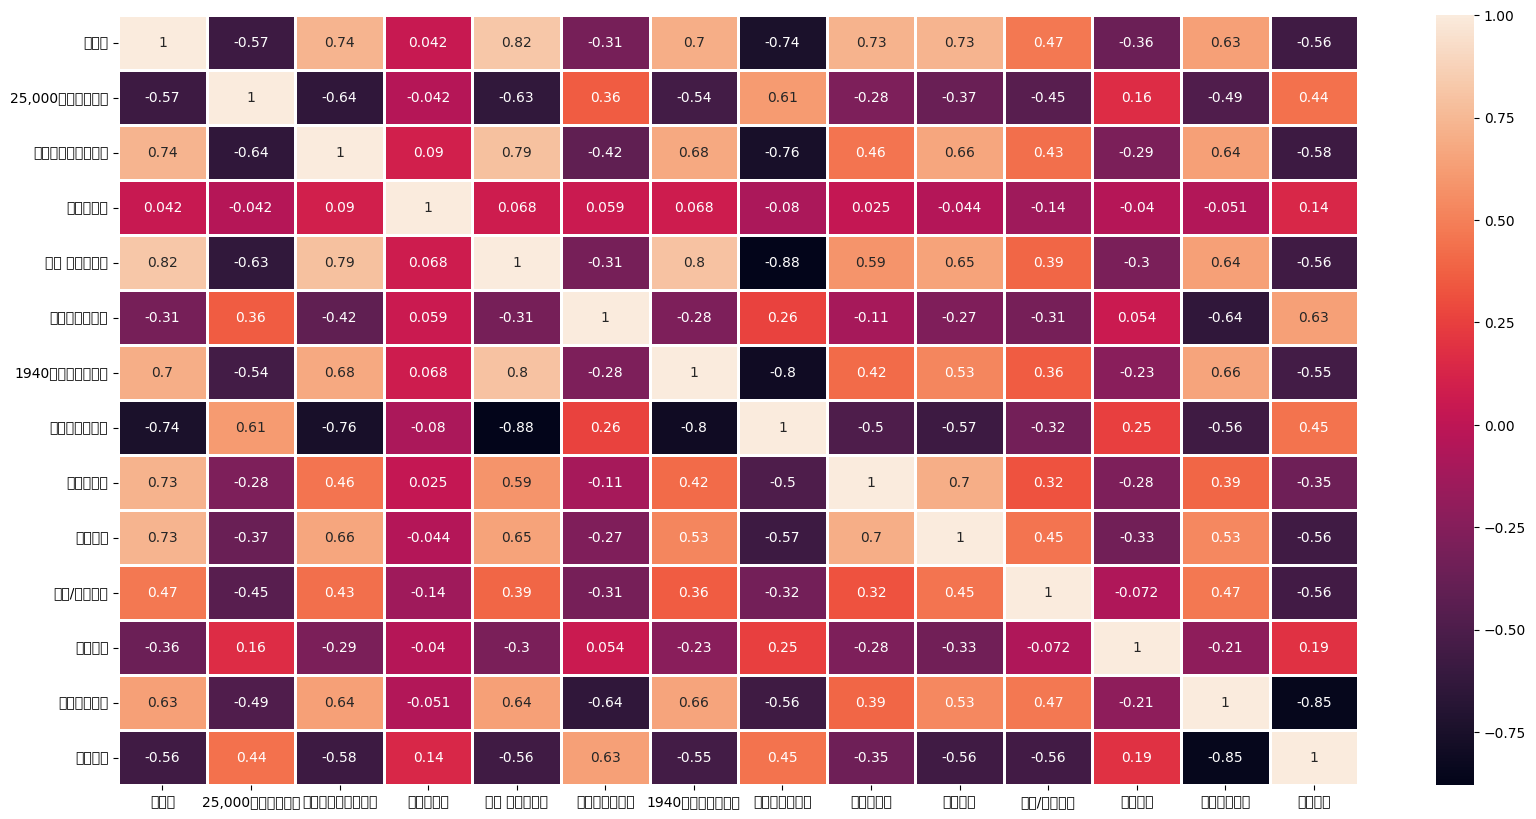

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(method='spearman'), annot=True, linewidth=1)

C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 51396 (\N{HANGUL SYLLABLE JOE}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s

C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu

C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51396 (\N{HANGUL SYLLABLE JOE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\finte

C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\5-11\miniforge3\envs\fintech\l

C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) mi

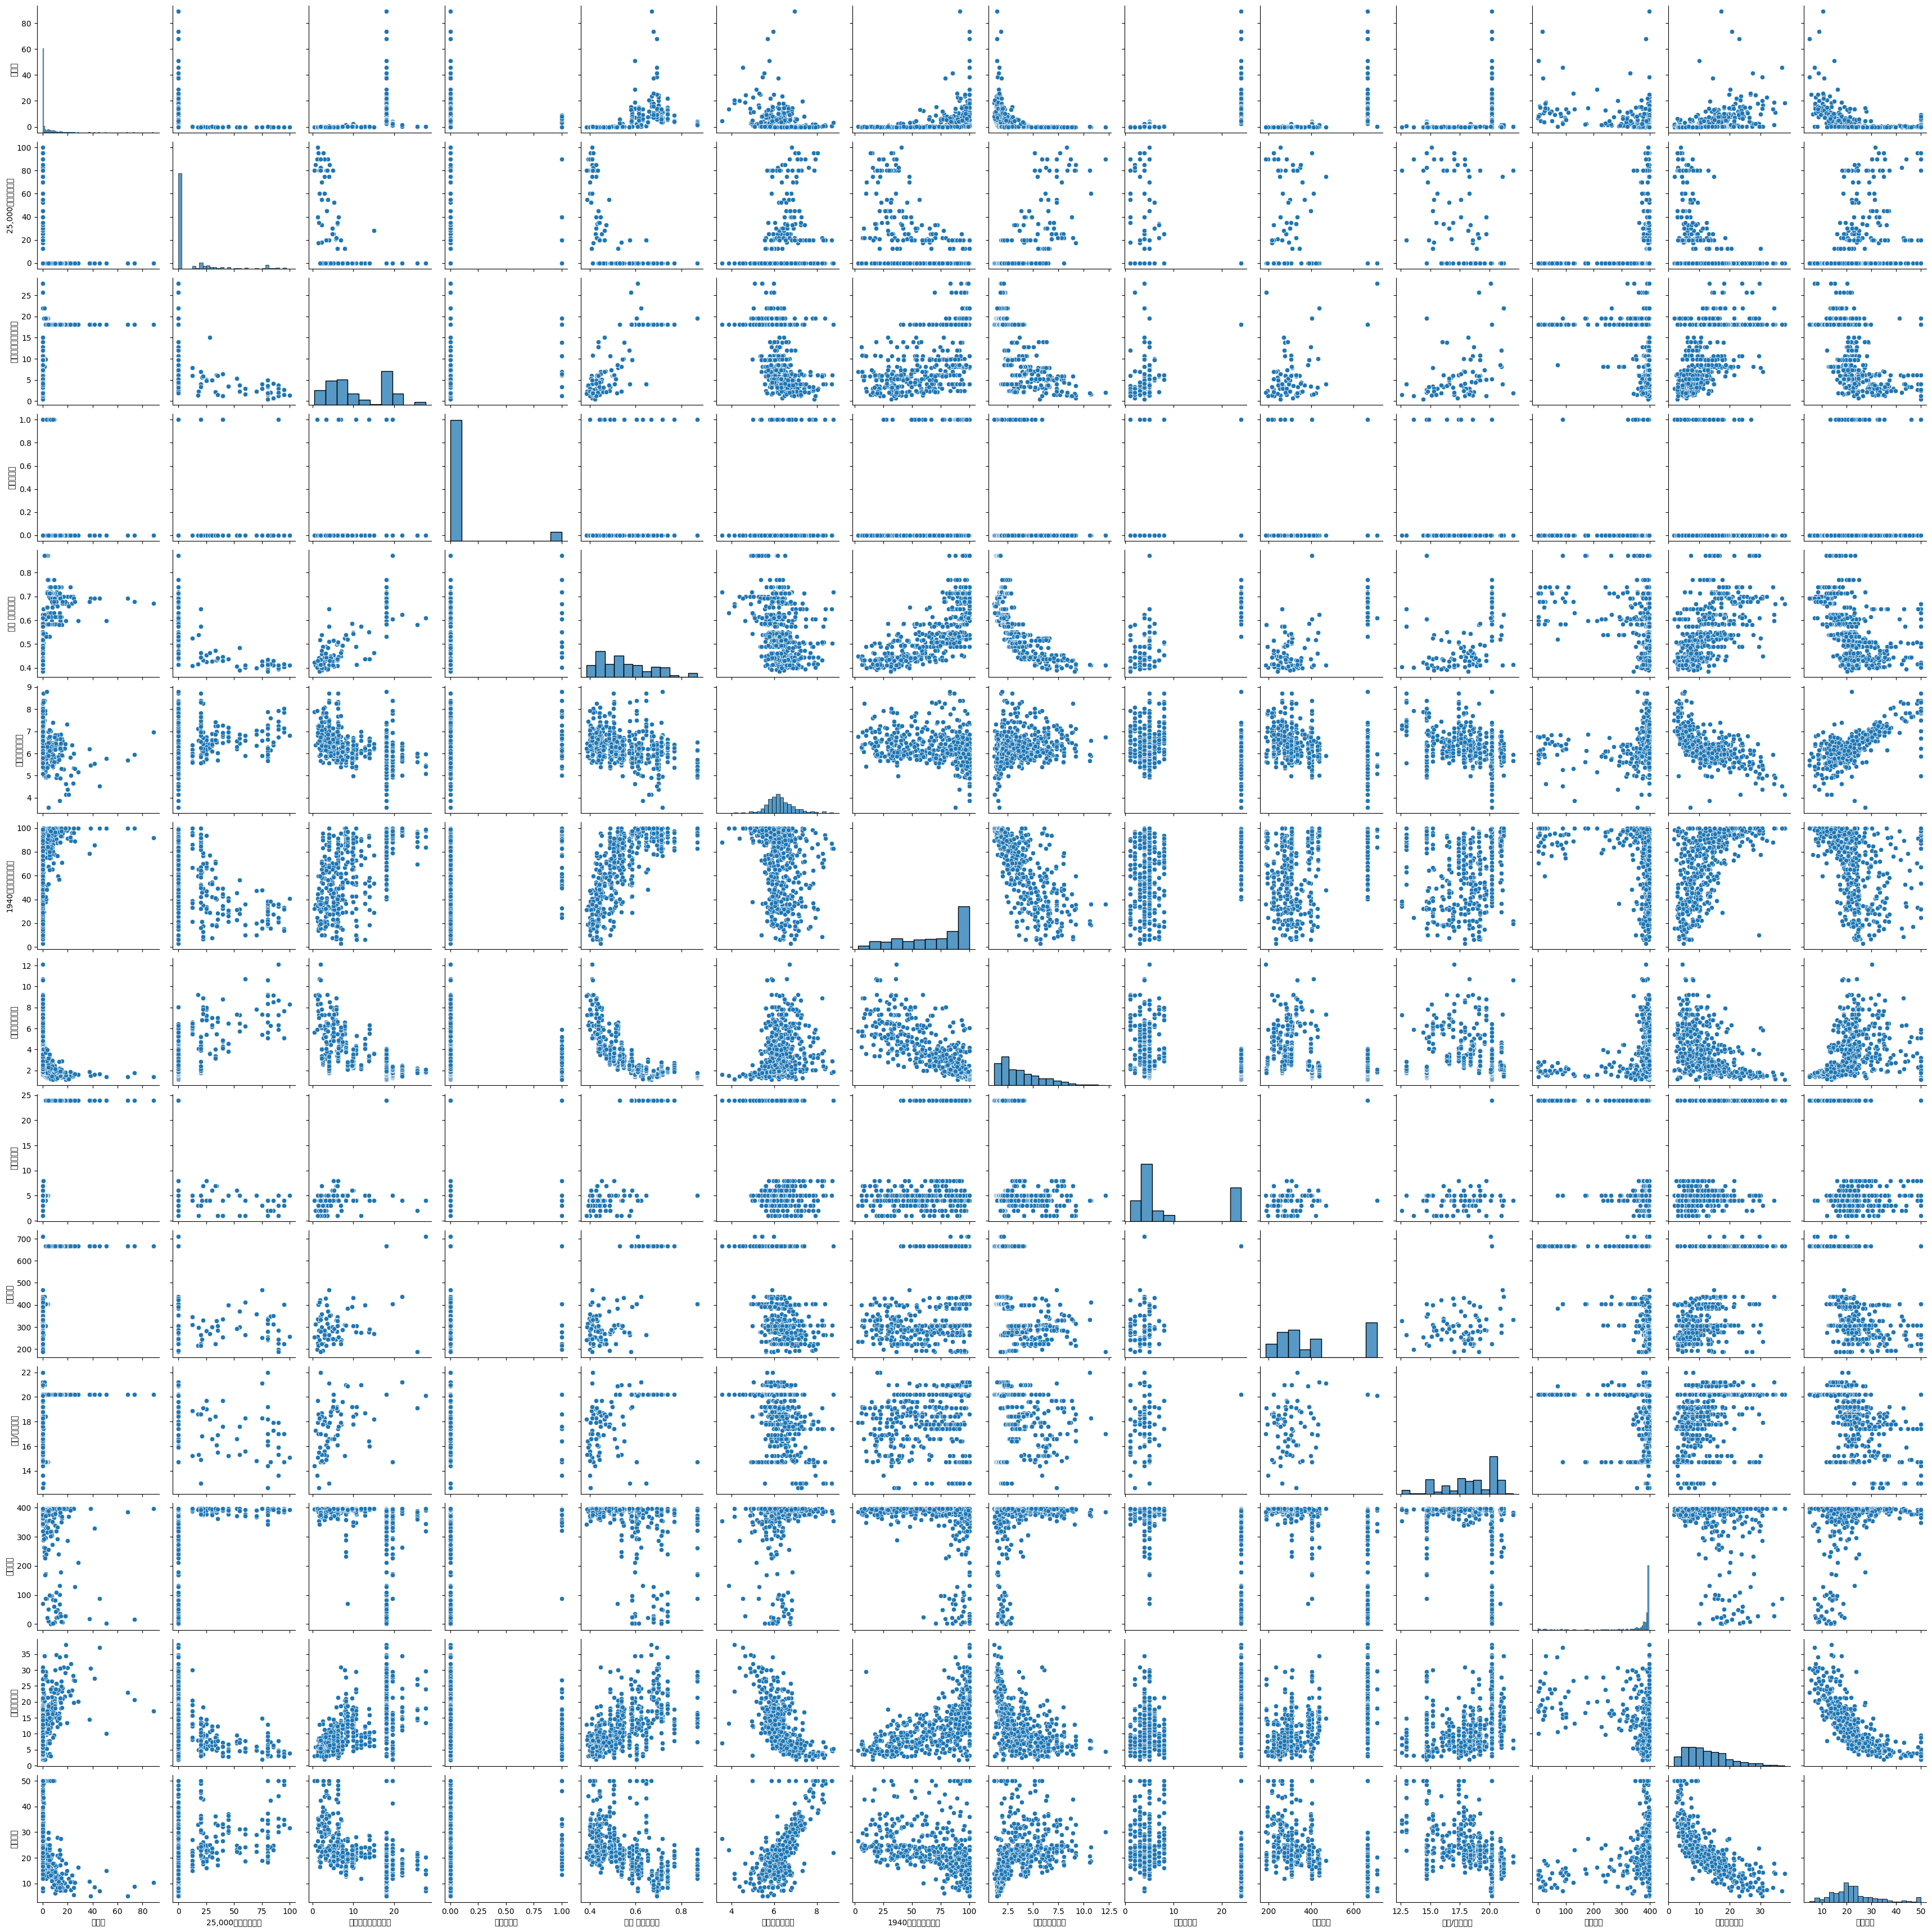

In [20]:
sns.pairplot(data)

In [21]:
X = data.drop('주택가격', axis=1)
y = data['주택가격']

In [22]:
X.head()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


 데이터 스케일링:

* standard: 표준 정규분포 - 데이터의 특성 사라짐, 이상값 취약
* min-max: 모든 데이터를 0-1사이의 숫자로 스케일링, 데이터의 특성 유지, 이상값 취약
* robust: 사분위수를 이용해서 스케일링, 이상값이 있는 데이터에 사용

In [23]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_scaled = rs.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns= X.columns)
X_scaled

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.173509,0.0,0.200000,0.521003,-0.171254,-0.236007,-0.20,-0.147287,0.696429,0.026382,-0.168916
502,-0.058759,0.00,0.173509,0.0,0.200000,-0.119919,-0.016310,-0.297887,-0.20,-0.147287,0.696429,0.261902,-0.227886
503,-0.054450,0.00,0.173509,0.0,0.200000,1.039973,0.275229,-0.336744,-0.20,-0.147287,0.696429,0.261902,-0.571714
504,-0.040867,0.00,0.173509,0.0,0.200000,0.793360,0.240571,-0.265053,-0.20,-0.147287,0.696429,0.096414,-0.487756


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
# 상수항 추가
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [28]:
ols = sm.OLS(y_train, X_train).fit()
pred = ols.predict(X_test)
print("mean_absolute_error(MAE):", mean_absolute_error(y_test, pred))
print("mean_squared_error(MSE):", mean_squared_error(y_test, pred))
print("root_mean_squared_error(RMSE):", np.sqrt(mean_squared_error(y_test, pred)))
print("r2_score(r-squared):", r2_score(y_test, pred))

mean_absolute_error(MAE): 3.18909196588783
mean_squared_error(MSE): 24.29111947497336
root_mean_squared_error(RMSE): 4.928602182665321
r2_score(r-squared): 0.6687594935356341


In [29]:
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.43
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          6.21e-109
Time:                        11:03:02   Log-Likelihood:                -1194.3
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.1973      0.374     61.961   

# 1차 회귀 분석 후 유의하지 않은 컬럼 제거 후 재분석

In [30]:
X_scaled2 = X_scaled.drop(["25,000평방피트초과", "비소매상업지역비율", "1940년이전건축비율"], axis=1)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_scaled2, y, test_size=0.2, random_state=42)

In [33]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
# 상수항 추가
X2_train = sm.add_constant(X2_train)
X2_test = sm.add_constant(X2_test)

In [35]:
ols2 = sm.OLS(y2_train, X2_train).fit()
pred2 = ols2.predict(X2_test)
print("mean_absolute_error(MAE):", mean_absolute_error(y2_test, pred2))
print("mean_squared_error(MSE):", mean_squared_error(y2_test, pred2))
print("root_mean_squared_error(RMSE):", np.sqrt(mean_squared_error(y2_test, pred2)))
print("r2_score(r-squared):", r2_score(y2_test, pred2))

mean_absolute_error(MAE): 3.2656420568051523
mean_squared_error(MSE): 25.500212598176372
root_mean_squared_error(RMSE): 5.049773519493361
r2_score(r-squared): 0.6522719611720074


In [36]:
print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     116.8
Date:                Mon, 02 Sep 2024   Prob (F-statistic):          3.85e-111
Time:                        11:03:02   Log-Likelihood:                -1196.4
No. Observations:                 404   AIC:                             2415.
Df Residuals:                     393   BIC:                             2459.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3391      0.356     65.580      0.0

C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\5-11\miniforge3\envs\fintech\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


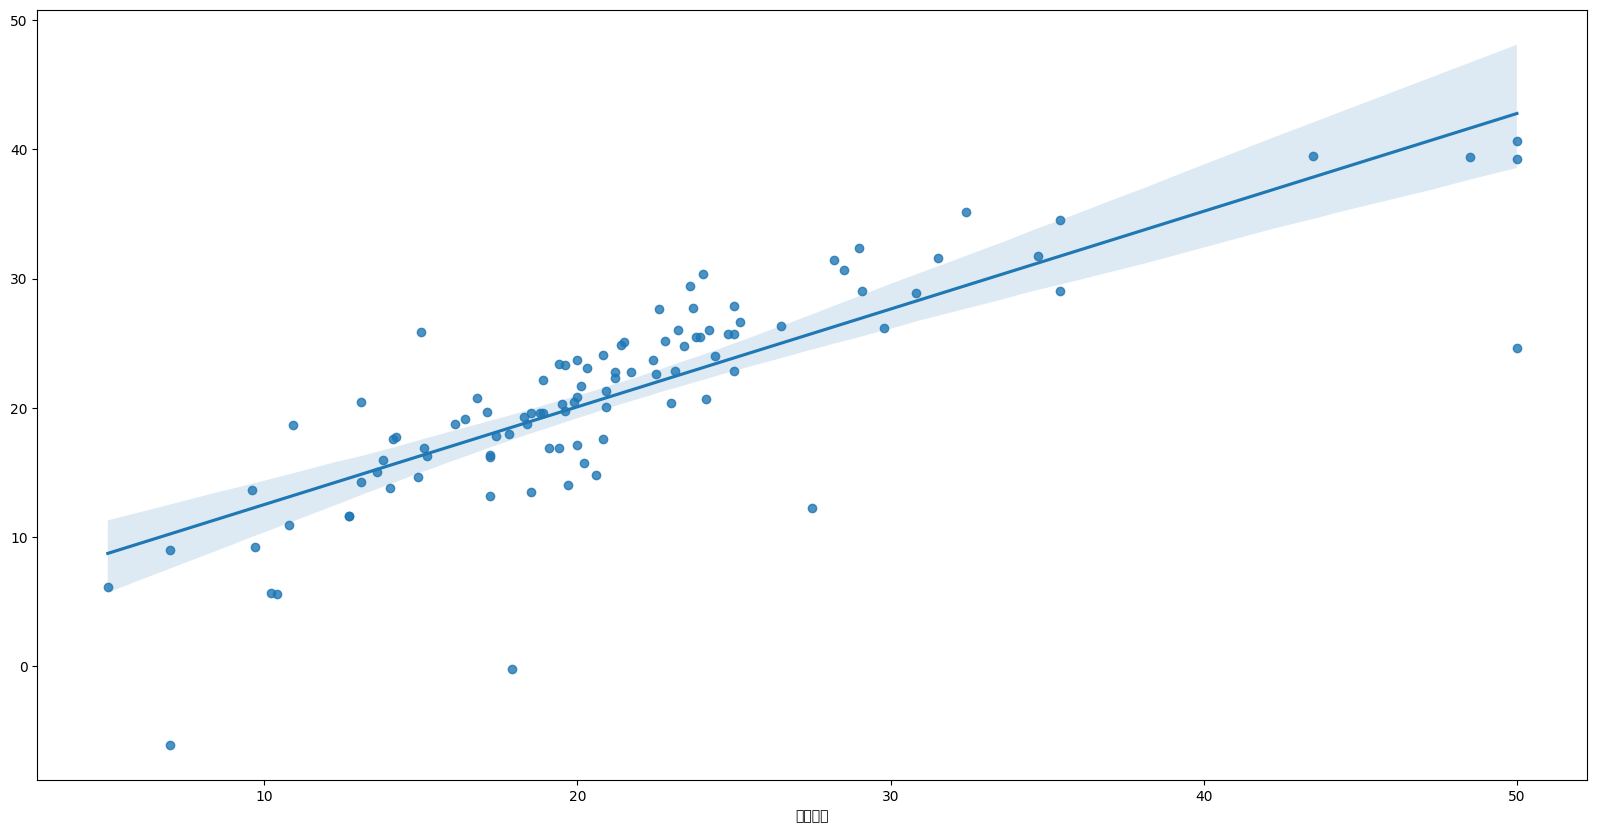

In [37]:
plt.figure(figsize=(20,10))
sns.regplot(x=y2_test, y=pred2, scatter=True)
plt.show()

In [38]:
y2_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: 주택가격, Length: 102, dtype: float64

In [39]:
pred2

173    29.457566
274    35.132381
491    15.017187
72     25.170393
452    18.751314
         ...    
412    -0.198163
436    13.650055
411    16.194616
86     22.607189
75     24.874674
Length: 102, dtype: float64

In [40]:
result_df = pd.DataFrame([y2_test, pred2], index=['실제주택가격', '예측가격']).T
result_df

,실제주택가격,예측가격
173,23.6,29.457566
274,32.4,35.132381
491,13.6,15.017187
72,22.8,25.170393
452,16.1,18.751314
...,...,...
412,17.9,-0.198163
436,9.6,13.650055
411,17.2,16.194616
86,22.5,22.607189


In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
lr_result = pd.DataFrame(lr.coef_, index=lr.feature_names_in_)
display(lr_result)
print("intercept", lr.intercept_)
print()
print("mean_absolute_error(MAE):", mean_absolute_error(y_test, pred))
print("mean_squared_error(MSE):", mean_squared_error(y_test, pred))
print("root_mean_squared_error(RMSE):", np.sqrt(mean_squared_error(y_test, pred)))
print("r2_score(r-squared):", r2_score(y_test, pred))

,0
const,0.000000
범죄율,-0.406440
"25,000평방피트초과",0.376381
비소매상업지역비율,0.521315
찰스강경계,2.784438
농축 일산화질소,-3.010461
가구당평균방수,3.275860
1940년이전건축비율,-0.308837
직업센터접근성,-4.471370
도로접근성,5.248595


intercept 23.197310834538445

mean_absolute_error(MAE): 3.1890919658878487
mean_squared_error(MSE): 24.291119474973538
root_mean_squared_error(RMSE): 4.928602182665339
r2_score(r-squared): 0.6687594935356317


# 라쏘(L1 제약, 절대값으로 제약, 변수를 분석에서 제외)
* 모델의 과적합을 방지하고 범용성을 높이는 것에 목적

In [42]:
from sklearn.linear_model import Lasso

In [43]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)
lasso_result = pd.DataFrame(lasso.coef_, index=lasso.feature_names_in_)
display(lasso_result)
print("intercept", lasso.intercept_)
print()
print("mean_absolute_error(MAE):", mean_absolute_error(y_test, pred))
print("mean_squared_error(MSE):", mean_squared_error(y_test, pred))
print("root_mean_squared_error(RMSE):", np.sqrt(mean_squared_error(y_test, pred)))
print("r2_score(r-squared):", r2_score(y_test, pred))

,0
const,0.000000
범죄율,-0.324081
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,3.857782
1940년이전건축비율,-0.000000
직업센터접근성,-0.000000
도로접근성,-0.000000


intercept 23.117837327673165

mean_absolute_error(MAE): 3.7428361478170036
mean_squared_error(MSE): 31.60115528002909
root_mean_squared_error(RMSE): 5.6214904856300425
r2_score(r-squared): 0.569077798551012


alpha값을 변경하면서 결과 비교

In [45]:
for i in range(1, 101, 10):
    
    lasso = Lasso(alpha=i)
    lasso.fit(X_train, y_train)
    pred = lasso.predict(X_test)
    lasso_result = pd.DataFrame(lasso.coef_, index=lasso.feature_names_in_)
    print("alpha:",i)
    display(lasso_result)
    print("intercept", lasso.intercept_)
    print()
    print("mean_absolute_error(MAE):", mean_absolute_error(y_test, pred))
    print("mean_squared_error(MSE):", mean_squared_error(y_test, pred))
    print("root_mean_squared_error(RMSE):", np.sqrt(mean_squared_error(y_test, pred)))
    print("r2_score(r-squared):", r2_score(y_test, pred))

alpha: 1


,0
const,0.000000
범죄율,-0.324081
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,3.857782
1940년이전건축비율,-0.000000
직업센터접근성,-0.000000
도로접근성,-0.000000


intercept 23.117837327673165

mean_absolute_error(MAE): 3.7428361478170036
mean_squared_error(MSE): 31.60115528002909
root_mean_squared_error(RMSE): 5.6214904856300425
r2_score(r-squared): 0.569077798551012
alpha: 11


,0
const,0.00000
범죄율,-0.00000
"25,000평방피트초과",0.00000
비소매상업지역비율,-0.00000
찰스강경계,0.00000
농축 일산화질소,-0.00000
가구당평균방수,0.00000
1940년이전건축비율,-0.00000
직업센터접근성,0.00000
도로접근성,-0.00000


intercept 23.050555966602555

mean_absolute_error(MAE): 6.107983030218104
mean_squared_error(MSE): 72.03013347955924
root_mean_squared_error(RMSE): 8.48705682080421
r2_score(r-squared): 0.017776932057543826
alpha: 21


,0
const,0.0
범죄율,-0.0
"25,000평방피트초과",0.0
비소매상업지역비율,-0.0
찰스강경계,0.0
농축 일산화질소,-0.0
가구당평균방수,0.0
1940년이전건축비율,-0.0
직업센터접근성,0.0
도로접근성,-0.0


intercept 22.796534653465343

mean_absolute_error(MAE): 6.255843525529023
mean_squared_error(MSE): 75.04543037399255
root_mean_squared_error(RMSE): 8.662876564628665
r2_score(r-squared): -0.023340500652033302
alpha: 31


,0
const,0.0
범죄율,-0.0
"25,000평방피트초과",0.0
비소매상업지역비율,-0.0
찰스강경계,0.0
농축 일산화질소,-0.0
가구당평균방수,0.0
1940년이전건축비율,-0.0
직업센터접근성,0.0
도로접근성,-0.0


intercept 22.796534653465343

mean_absolute_error(MAE): 6.255843525529023
mean_squared_error(MSE): 75.04543037399255
root_mean_squared_error(RMSE): 8.662876564628665
r2_score(r-squared): -0.023340500652033302
alpha: 41


,0
const,0.0
범죄율,-0.0
"25,000평방피트초과",0.0
비소매상업지역비율,-0.0
찰스강경계,0.0
농축 일산화질소,-0.0
가구당평균방수,0.0
1940년이전건축비율,-0.0
직업센터접근성,0.0
도로접근성,-0.0


intercept 22.796534653465343

mean_absolute_error(MAE): 6.255843525529023
mean_squared_error(MSE): 75.04543037399255
root_mean_squared_error(RMSE): 8.662876564628665
r2_score(r-squared): -0.023340500652033302
alpha: 51


,0
const,0.0
범죄율,-0.0
"25,000평방피트초과",0.0
비소매상업지역비율,-0.0
찰스강경계,0.0
농축 일산화질소,-0.0
가구당평균방수,0.0
1940년이전건축비율,-0.0
직업센터접근성,0.0
도로접근성,-0.0


intercept 22.796534653465343

mean_absolute_error(MAE): 6.255843525529023
mean_squared_error(MSE): 75.04543037399255
root_mean_squared_error(RMSE): 8.662876564628665
r2_score(r-squared): -0.023340500652033302
alpha: 61


,0
const,0.0
범죄율,-0.0
"25,000평방피트초과",0.0
비소매상업지역비율,-0.0
찰스강경계,0.0
농축 일산화질소,-0.0
가구당평균방수,0.0
1940년이전건축비율,-0.0
직업센터접근성,0.0
도로접근성,-0.0


intercept 22.796534653465343

mean_absolute_error(MAE): 6.255843525529023
mean_squared_error(MSE): 75.04543037399255
root_mean_squared_error(RMSE): 8.662876564628665
r2_score(r-squared): -0.023340500652033302
alpha: 71


,0
const,0.0
범죄율,-0.0
"25,000평방피트초과",0.0
비소매상업지역비율,-0.0
찰스강경계,0.0
농축 일산화질소,-0.0
가구당평균방수,0.0
1940년이전건축비율,-0.0
직업센터접근성,0.0
도로접근성,-0.0


intercept 22.796534653465343

mean_absolute_error(MAE): 6.255843525529023
mean_squared_error(MSE): 75.04543037399255
root_mean_squared_error(RMSE): 8.662876564628665
r2_score(r-squared): -0.023340500652033302
alpha: 81


,0
const,0.0
범죄율,-0.0
"25,000평방피트초과",0.0
비소매상업지역비율,-0.0
찰스강경계,0.0
농축 일산화질소,-0.0
가구당평균방수,0.0
1940년이전건축비율,-0.0
직업센터접근성,0.0
도로접근성,-0.0


intercept 22.796534653465343

mean_absolute_error(MAE): 6.255843525529023
mean_squared_error(MSE): 75.04543037399255
root_mean_squared_error(RMSE): 8.662876564628665
r2_score(r-squared): -0.023340500652033302
alpha: 91


,0
const,0.0
범죄율,-0.0
"25,000평방피트초과",0.0
비소매상업지역비율,-0.0
찰스강경계,0.0
농축 일산화질소,-0.0
가구당평균방수,0.0
1940년이전건축비율,-0.0
직업센터접근성,0.0
도로접근성,-0.0


intercept 22.796534653465343

mean_absolute_error(MAE): 6.255843525529023
mean_squared_error(MSE): 75.04543037399255
root_mean_squared_error(RMSE): 8.662876564628665
r2_score(r-squared): -0.023340500652033302


# 릿지(L2 제약, 가중치의 제곱합을 이용해서 제약, 변수를 0에 가깝게 만들어 무력화)


In [46]:
from sklearn.linear_model import Ridge

In [48]:
ridge = Ridge()
ridge.fit(X2_train, y2_train)
pred = ridge.predict(X2_test)
print('Mean_squared_error(MSE):', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMSE):', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared:', r2_score(y2_test,pred))


Mean_squared_error(MSE): 25.657998767341915
Root_Mean_squared_error(RMSE): 5.065372520095823
R-squared: 0.6501203447905016


# Elasticnet (Lasso와Ridge를 동시에 사용, L1규제, L2규제 조합)


In [49]:
from sklearn.linear_model import ElasticNet

In [56]:
el_net = ElasticNet(alpha=10.0, l1_ratio=0.05)
el_net.fit(X2_train, y2_train)
pred = el_net.predict(X2_test)
print('Mean_squared_error(MSE):', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMSE):', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared:', r2_score(y2_test,pred))

Mean_squared_error(MSE): 56.44287691673096
Root_Mean_squared_error(RMSE): 7.512847457304784
R-squared: 0.23032912684546702


# Tree 기반의 회귀분석
* DecisionTree
* XGBoost
* LightGBM
* RandomForest

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
dtr = DecisionTreeRegressor(max_depth=3, random_state=7)
dtr.fit(X2_train, y2_train)
pred = dtr.predict(X2_test)
print('Mean_squared_error(MSE):', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMSE):', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared:', r2_score(y2_test,pred))

Mean_squared_error(MSE): 16.766567150642494
Root_Mean_squared_error(RMSE): 4.094699885295929
R-squared: 0.7713663958398644


In [59]:
dtr = DecisionTreeRegressor(max_depth=5, random_state=7)
dtr.fit(X2_train, y2_train)
pred = dtr.predict(X2_test)
print('Mean_squared_error(MSE):', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMSE):', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared:', r2_score(y2_test,pred))

Mean_squared_error(MSE): 7.663269666462047
Root_Mean_squared_error(RMSE): 2.7682611268559993
R-squared: 0.8955015091788113


In [63]:
pd.DataFrame([dtr.feature_importances_], columns=dtr.feature_names_in_).T.sort_values(by=0, ascending=False)

,0
가구당평균방수,0.629637
하위계층비율,0.195633
직업센터접근성,0.076704
범죄율,0.054430
농축 일산화질소,0.025299
흑인비율,0.011355
학생/교사비율,0.006943
const,0.000000
찰스강경계,0.000000
도로접근성,0.000000


In [65]:
from sklearn.tree import plot_tree

[Text(0.5, 0.875, 'x[4] <= 0.993\nsquared_error = 86.873\nsamples = 404\nvalue = 22.797'),
 Text(0.25, 0.625, 'x[10] <= 0.304\nsquared_error = 40.321\nsamples = 337\nvalue = 19.947'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= -0.59\nsquared_error = 25.693\nsamples = 203\nvalue = 23.325'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[1] <= 1.855\nsquared_error = 19.005\nsamples = 134\nvalue = 14.829'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[4] <= 1.665\nsquared_error = 74.684\nsamples = 67\nvalue = 37.131'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[3] <= 0.691\nsquared_error = 38.306\nsamples = 41\nvalue = 32.363'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[1] <= 0.691\nsquared_error = 39.671\nsamples = 26\nvalue = 44.65'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '

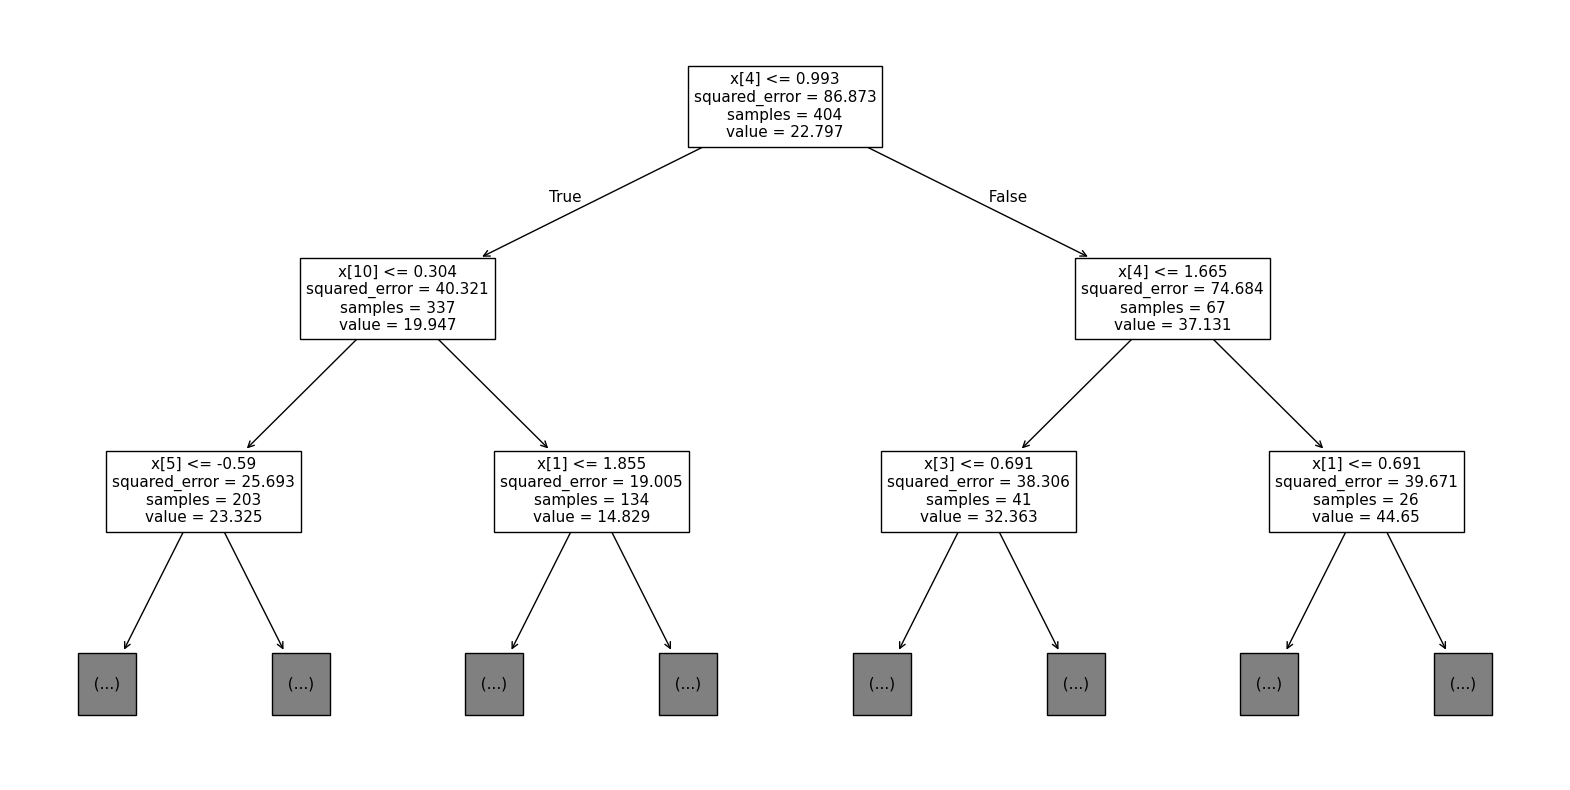

In [68]:
plt.figure(figsize=(20,10))
plot_tree(dtr, max_depth=2)

# XGBoostRegressor를 사용한 분석

In [69]:
from xgboost import XGBRegressor

In [70]:
xgb = XGBRegressor(n_estimators=500, max_depth=3, n_jobs=-1, random_state =7)

In [71]:
xgb.fit(X2_train, y2_train)
pred = xgb.predict(X2_test)
print('Mean_squared_error(MSE):', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMSE):', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared:', r2_score(y2_test,pred))

Mean_squared_error(MSE): 7.374535881372344
Root_Mean_squared_error(RMSE): 2.7156096702899597
R-squared: 0.8994387639152603


In [72]:
for i in range(1, 10):
    xgb = XGBRegressor(n_estimators=500, max_depth=i, n_jobs=-1, random_state =7)
    xgb.fit(X2_train, y2_train)
    pred = xgb.predict(X2_test)
    print("max_depth: ", i)
    print('Mean_squared_error(MSE):', mean_squared_error(y2_test, pred))
    print('Root_Mean_squared_error(RMSE):', np.sqrt(mean_squared_error(y2_test, pred)))
    print('R-squared:', r2_score(y2_test,pred))

max_depth:  1
Mean_squared_error(MSE): 8.480316562943871
Root_Mean_squared_error(RMSE): 2.9120983092855695
R-squared: 0.8843600289323117
max_depth:  2
Mean_squared_error(MSE): 6.401683893160884
Root_Mean_squared_error(RMSE): 2.530154914854204
R-squared: 0.9127048460166651
max_depth:  3
Mean_squared_error(MSE): 7.374535881372344
Root_Mean_squared_error(RMSE): 2.7156096702899597
R-squared: 0.8994387639152603
max_depth:  4
Mean_squared_error(MSE): 6.682936239787738
Root_Mean_squared_error(RMSE): 2.5851375668980823
R-squared: 0.9088696102698337
max_depth:  5
Mean_squared_error(MSE): 6.288947716545036
Root_Mean_squared_error(RMSE): 2.5077774455770663
R-squared: 0.9142421480861544
max_depth:  6
Mean_squared_error(MSE): 6.899478720898929
Root_Mean_squared_error(RMSE): 2.6266858816575174
R-squared: 0.9059167763673772
max_depth:  7
Mean_squared_error(MSE): 8.380394699280398
Root_Mean_squared_error(RMSE): 2.8948911377252857
R-squared: 0.8857225914424856
max_depth:  8
Mean_squared_error(MSE): 9.3

In [73]:
xgb = XGBRegressor(n_estimators=500, max_depth=5, n_jobs=-1, random_state =7)
xgb.fit(X2_train, y2_train)
pred = xgb.predict(X2_test)
print('Mean_squared_error(MSE):', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMSE):', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared:', r2_score(y2_test,pred))

Mean_squared_error(MSE): 6.288947716545036
Root_Mean_squared_error(RMSE): 2.5077774455770663
R-squared: 0.9142421480861544


In [78]:
#!pip install graphviz

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.1 kB 682.7 kB/s eta 0:00:01
   ----------------- ---------------------- 20.5/47.1 kB 682.7 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 338.4 kB/s eta 0:00:00


In [74]:
#import xgboost 

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

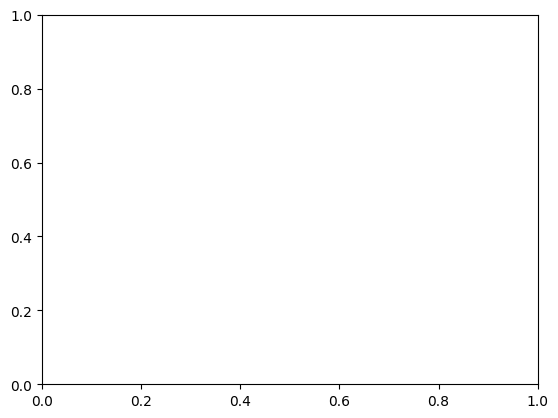

In [79]:
#xgboost.plot_tree(xgb)

XGBoost에서 L1, L2제약 조건 추가하기
* reg_alpha(L1 제약조건) L1 제약조건을 추가할 때 사용 Lasso
* reg_lambda(L2 제약조건) L2제약조건을 추가할 때 사용 Ridge

In [80]:
xgb = XGBRegressor(n_estimators=500, max_depth=5, reg_alpha=10.0, n_jobs=-1, random_state =7)
xgb.fit(X2_train, y2_train)
pred = xgb.predict(X2_test)
print('Mean_squared_error(MSE):', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMSE):', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared:', r2_score(y2_test,pred))

Mean_squared_error(MSE): 6.904102901075588
Root_Mean_squared_error(RMSE): 2.6275659651235377
R-squared: 0.9058537197517578


In [82]:
xgb = XGBRegressor(n_estimators=500, max_depth=5, reg_lambda=10.0, n_jobs=-1, random_state =7)
xgb.fit(X2_train, y2_train)
pred = xgb.predict(X2_test)
print('Mean_squared_error(MSE):', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMSE):', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared:', r2_score(y2_test,pred))

Mean_squared_error(MSE): 8.715101679362917
Root_Mean_squared_error(RMSE): 2.952135105201474
R-squared: 0.881158433347017


In [83]:
xgb = XGBRegressor(n_estimators=500, max_depth=5,reg_alpha=10.0, reg_lambda=10.0, n_jobs=-1, random_state =7)
xgb.fit(X2_train, y2_train)
pred = xgb.predict(X2_test)
print('Mean_squared_error(MSE):', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMSE):', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared:', r2_score(y2_test,pred))

Mean_squared_error(MSE): 8.354701566821744
Root_Mean_squared_error(RMSE): 2.8904500630216297
R-squared: 0.8860729501905469


In [84]:
pd.DataFrame([xgb.feature_importances_], columns=xgb.feature_names_in_).T.sort_values(by=0, ascending=False)

,0
하위계층비율,0.387917
가구당평균방수,0.310637
찰스강경계,0.103424
농축 일산화질소,0.051427
직업센터접근성,0.039324
학생/교사비율,0.038031
범죄율,0.022580
재산세율,0.021963
도로접근성,0.018361
흑인비율,0.006336


# LightGBMRegressor를 사용한 분석

In [85]:
from lightgbm import LGBMRegressor

In [87]:
lgbmr = LGBMRegressor(n_estimators=500, reg_alpha=10.0, reg_lambda=10.0, n_jobs=-1, random_state=7, verbose=-1)
lgbmr.fit(X2_train, y2_train)
pred = lgbmr.predict(X2_test)
print('Mean_squared_error(MSE):', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMSE):', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared:', r2_score(y2_test,pred))


Mean_squared_error(MSE): 7.812832336791151
Root_Mean_squared_error(RMSE): 2.7951444214550256
R-squared: 0.8934620307299479


In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rfr = RandomForestRegressor(n_estimators=500, max_depth=5, random_state=7)
rfr.fit(X2_train, y2_train)
pred = rfr.predict(X2_test)
print('Mean_squared_error(MSE):', mean_squared_error(y2_test, pred))
print('Root_Mean_squared_error(RMSE):', np.sqrt(mean_squared_error(y2_test, pred)))
print('R-squared:', r2_score(y2_test,pred))

Mean_squared_error(MSE): 9.55928161073301
Root_Mean_squared_error(RMSE): 3.091808792718756
R-squared: 0.8696469594397657
